In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [41]:
from sklearn.datasets import fetch_california_housing
ca = fetch_california_housing()


In [42]:
dir(ca)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [43]:
X = ca.data

In [44]:
Y = ca.target

In [45]:
data = np.concatenate((X,Y.reshape(-1,1)), axis=1)

In [46]:
df = pd.DataFrame(data, columns=ca.feature_names+['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [47]:
df.drop(['Latitude', 'Longitude'], axis=1, inplace=True)

In [48]:
features =['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',]
features

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

<ipython-input-49-d5994be2638e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


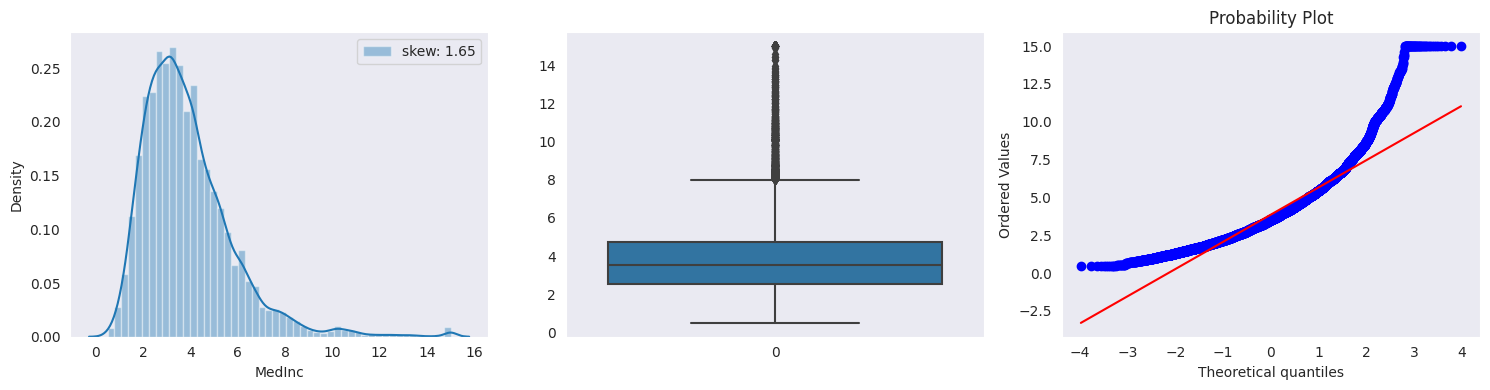

<ipython-input-49-d5994be2638e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


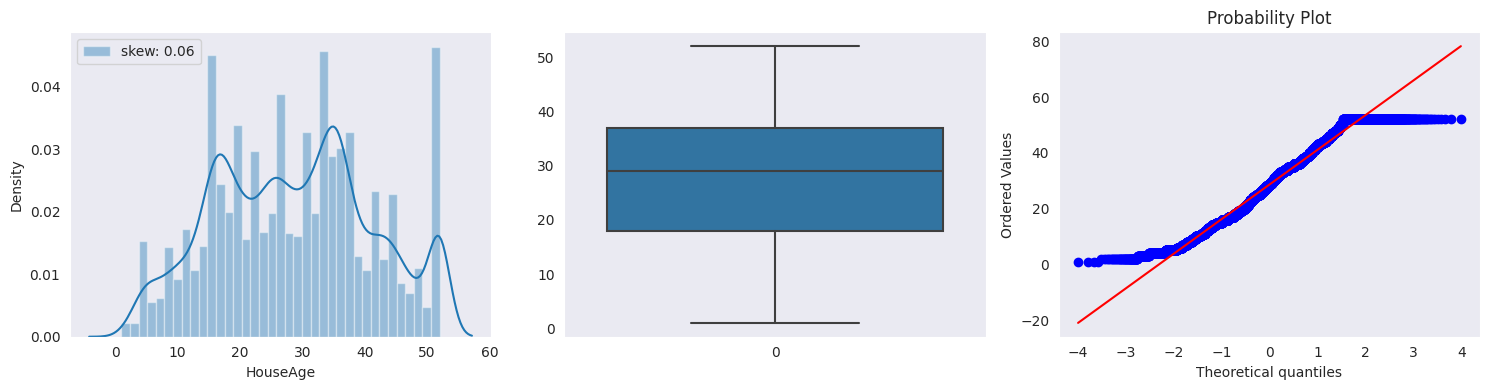

<ipython-input-49-d5994be2638e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


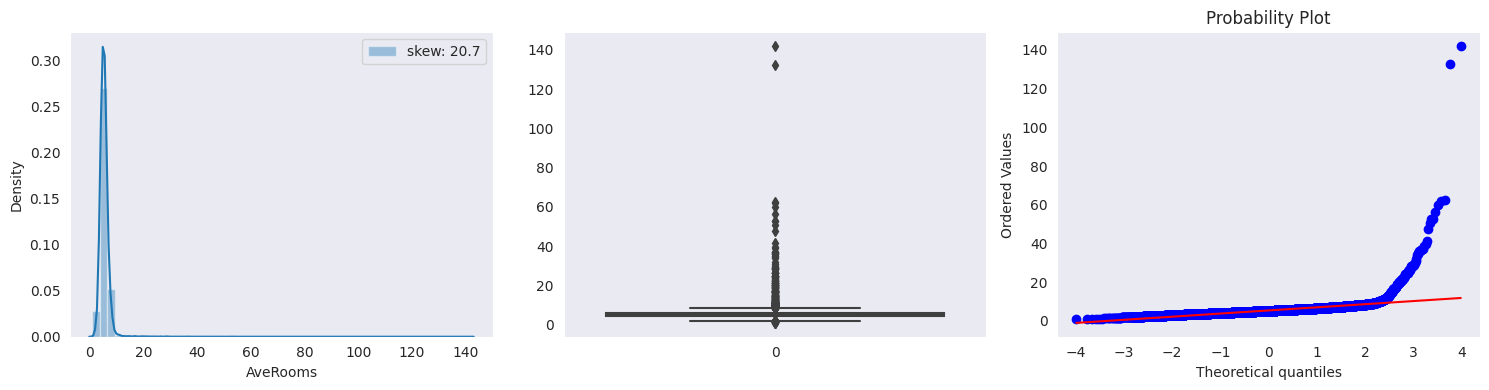

<ipython-input-49-d5994be2638e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


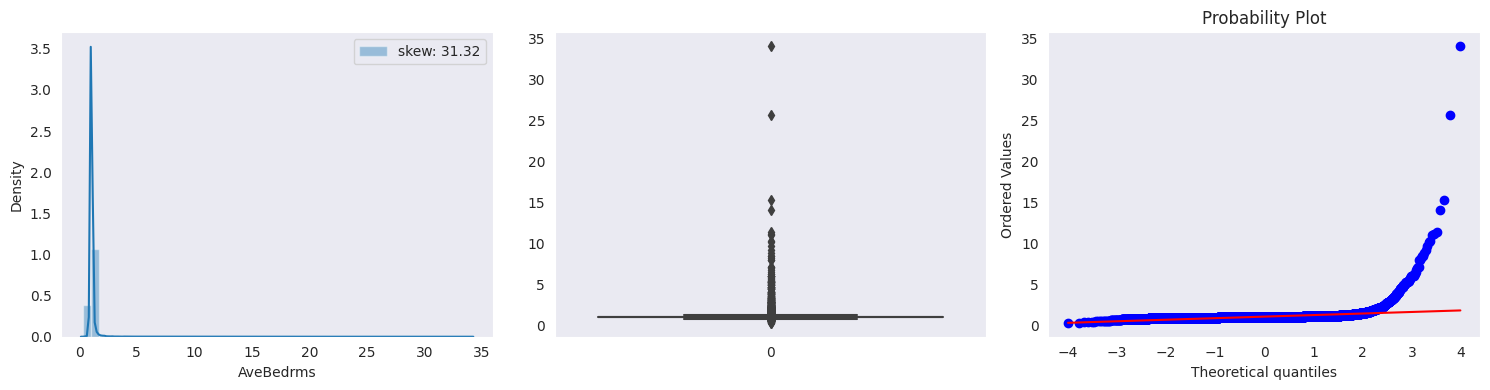

<ipython-input-49-d5994be2638e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


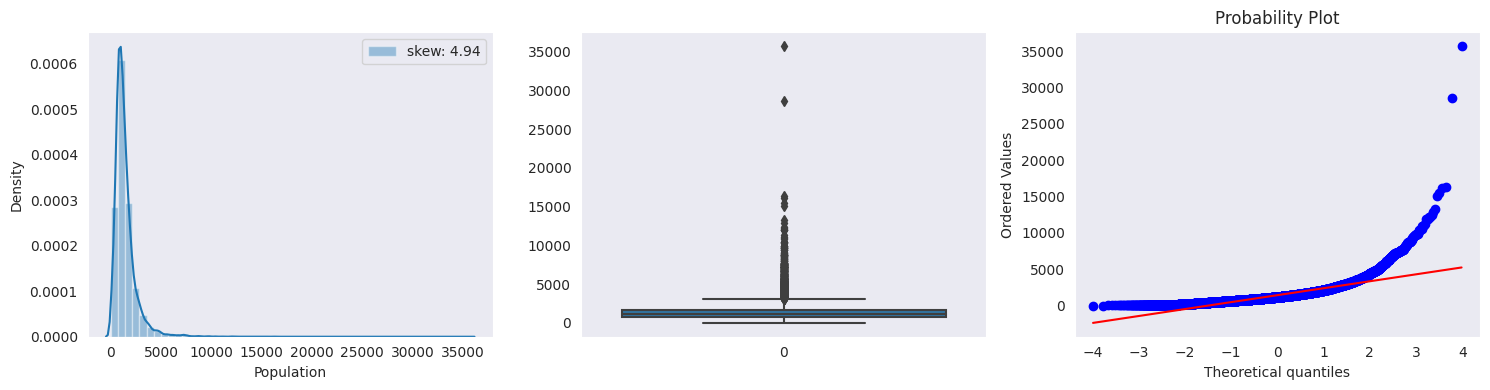

<ipython-input-49-d5994be2638e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))


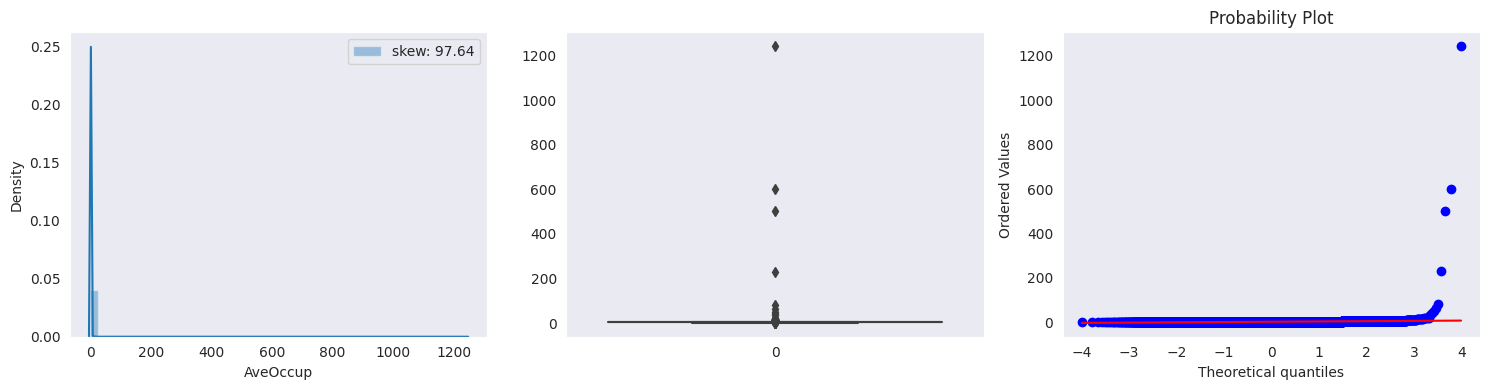

In [49]:
sns.set_style('dark')
for col in features:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    stats.probplot(df[col], plot=plt)
    plt.tight_layout()
    plt.show()


In [50]:
df_cap = df.copy()

In [51]:
def iqr_capping(df, cols, factor):

    for col in cols:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        df[col] = np.where(df[col]>upper_whisker, upper_whisker,
                np.where(df[col]<lower_whisker, lower_whisker, df[col]))

In [52]:
iqr_capping(df_cap, features, 1.5)

<ipython-input-53-6763a6144882>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
<ipython-input-53-6763a6144882>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


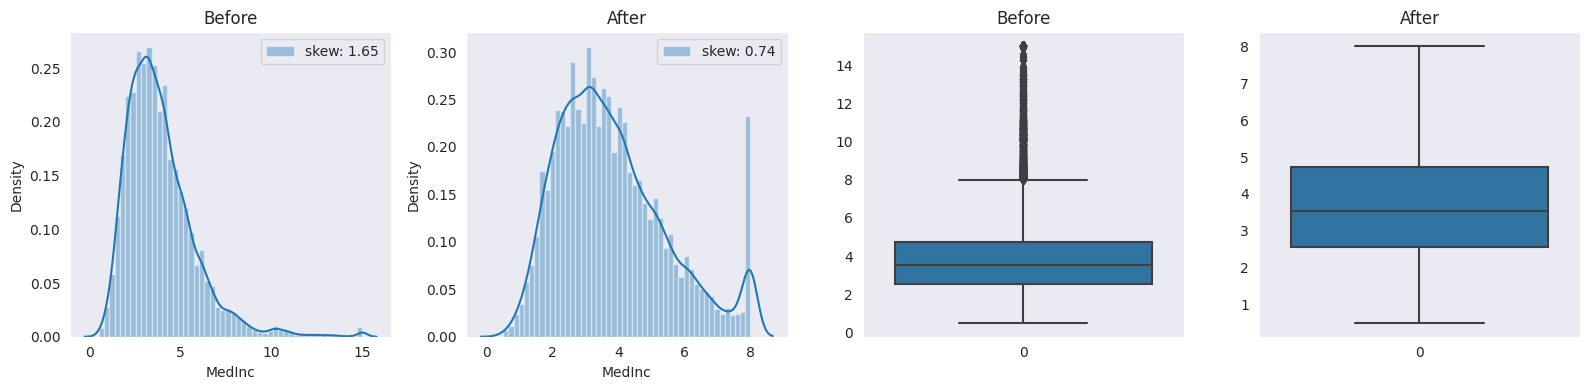

<ipython-input-53-6763a6144882>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
<ipython-input-53-6763a6144882>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


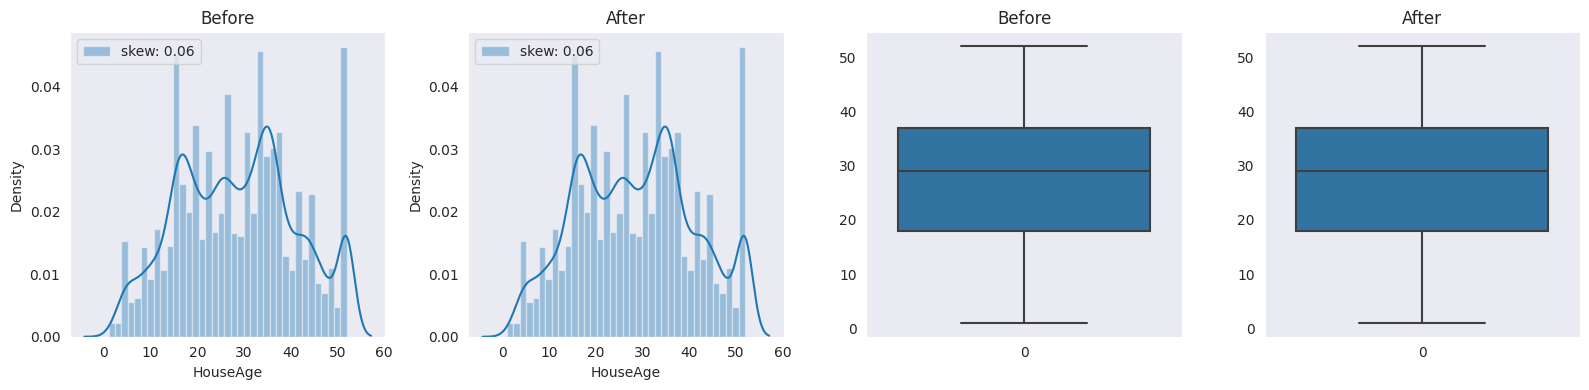

<ipython-input-53-6763a6144882>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
<ipython-input-53-6763a6144882>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


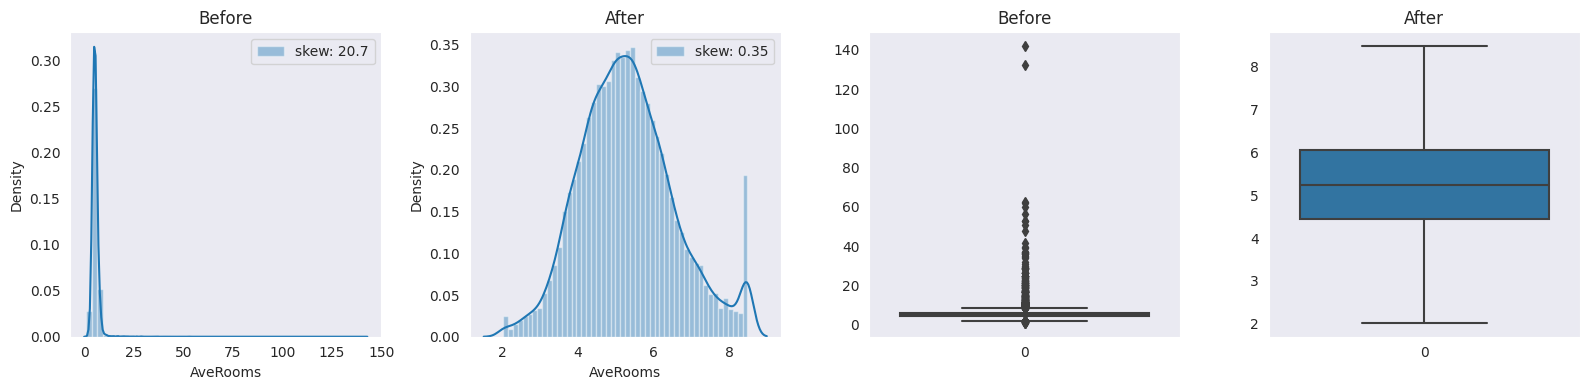

<ipython-input-53-6763a6144882>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
<ipython-input-53-6763a6144882>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


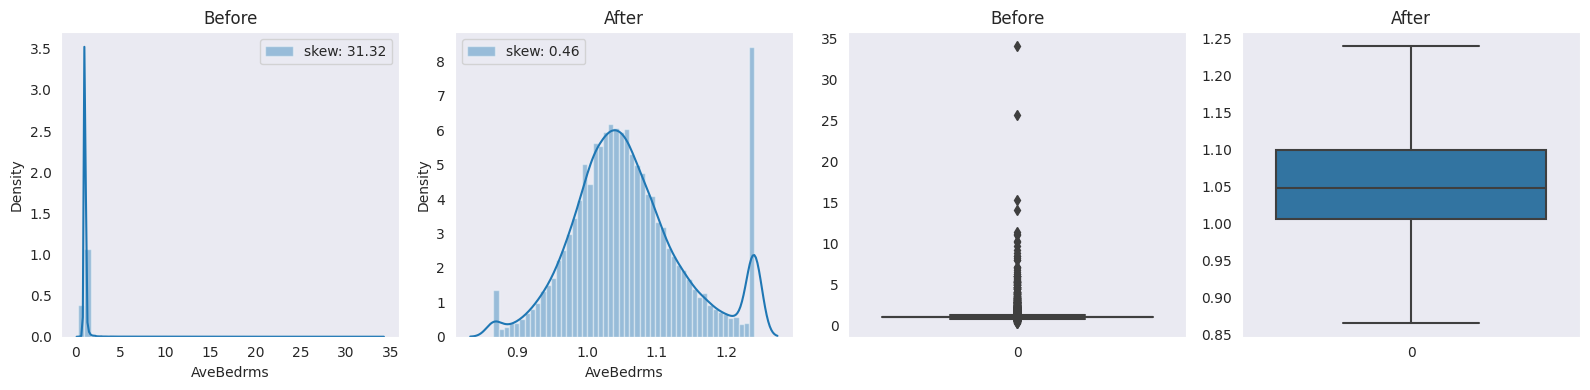

<ipython-input-53-6763a6144882>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
<ipython-input-53-6763a6144882>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


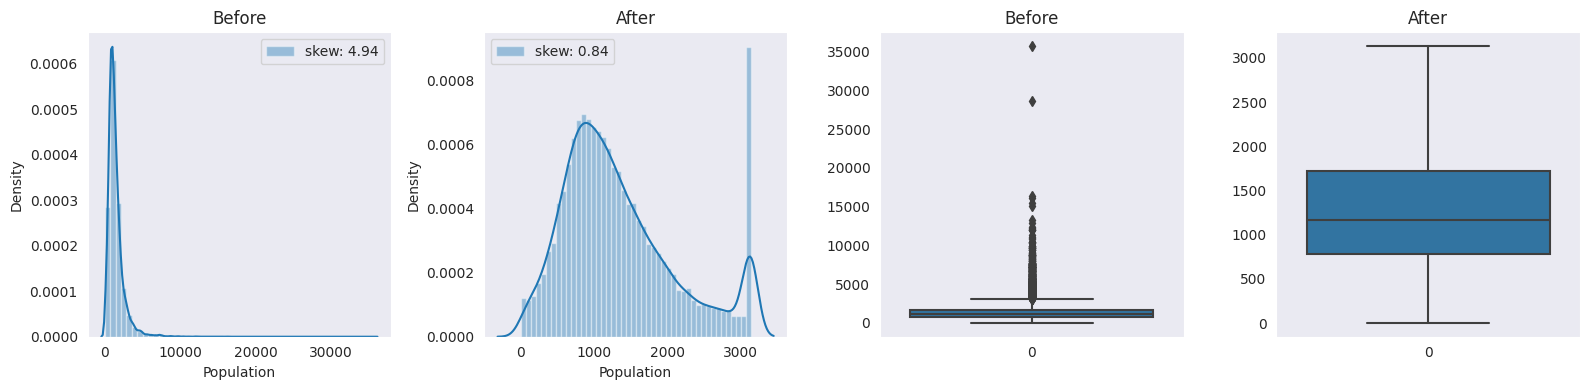

<ipython-input-53-6763a6144882>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
<ipython-input-53-6763a6144882>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))


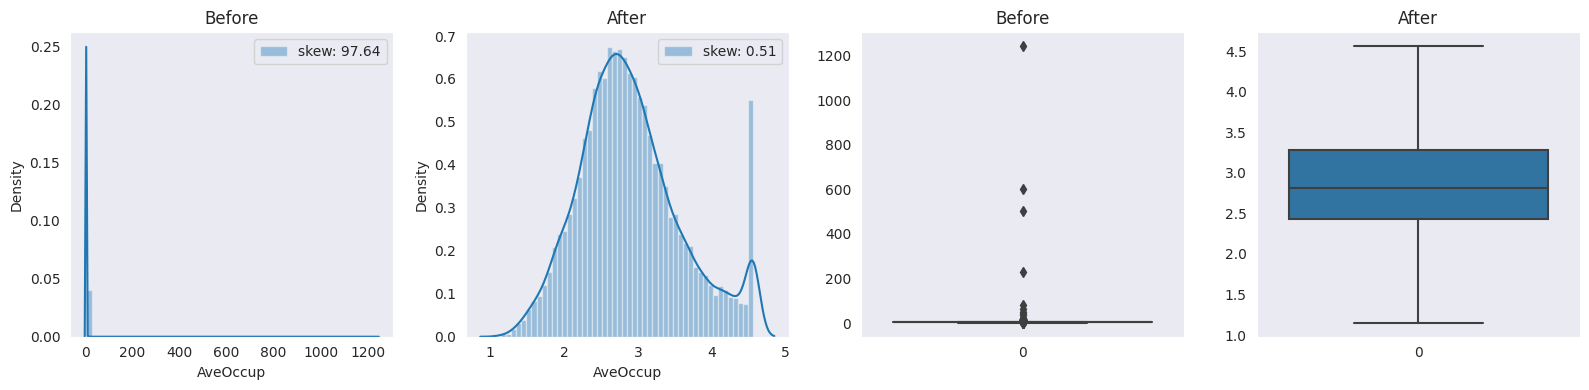

In [53]:
for col in features:
    plt.figure(figsize=(16,4))

    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()

    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()

    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')

    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show()



In [54]:
df_trim = df.copy()

In [56]:
def iqr_trimming(df, cols, factor):

    drop_outliers = np.array([])

    for col in cols:

        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1

        upper_whisker = q3 + (factor*iqr)
        lower_whisker = q1 - (factor*iqr)

        s = df[col]

        indexes = s[(s > upper_whisker) | (s< lower_whisker)].index

        drop_outliers = np.append(drop_outliers, indexes)

    return drop_outliers

In [57]:
s = df['Population']
s[(s > 3000) | (s<20)].index

Int64Index([   73,    95,   185,   283,   460,   485,   508,   536,   538,
              570,
            ...
            20527, 20529, 20530, 20539, 20543, 20544, 20563, 20567, 20604,
            20629],
           dtype='int64', length=1381)

In [58]:
dropped = np.unique(iqr_trimming(df_trim, features, 1.5))


In [20]:
df_trim.drop(dropped, inplace=True)

In [21]:
df_trim.shape

(20640, 7)

In [22]:
df.shape

(20640, 7)

In [ ]:
20640-16842

3798

In [23]:
3798/20640

0.18401162790697675

<ipython-input-59-c5b37b2fc6f3>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-59-c5b37b2fc6f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim[col], label="skew: " + str(np.round(df[col].skew(),2)))


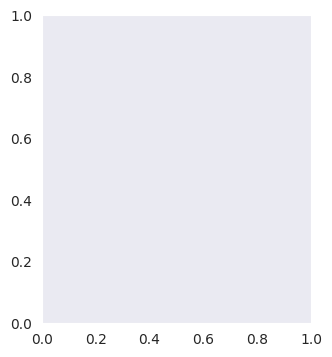

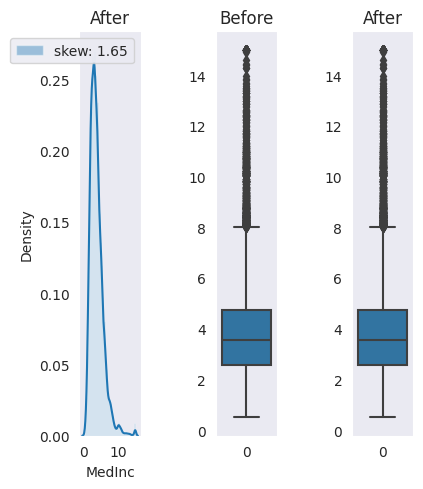

<ipython-input-59-c5b37b2fc6f3>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-59-c5b37b2fc6f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim[col], label="skew: " + str(np.round(df[col].skew(),2)))


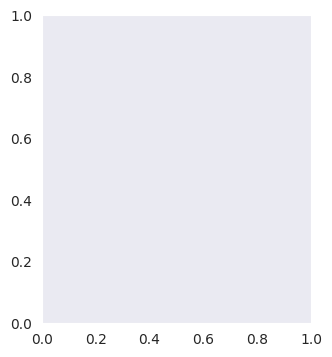

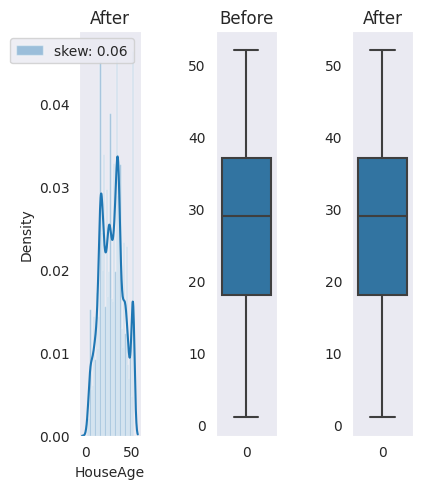

<ipython-input-59-c5b37b2fc6f3>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-59-c5b37b2fc6f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim[col], label="skew: " + str(np.round(df[col].skew(),2)))


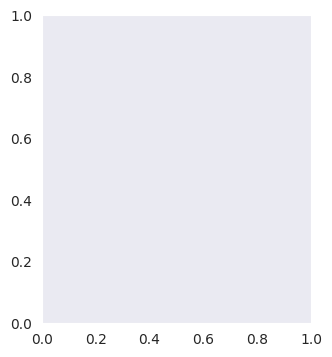

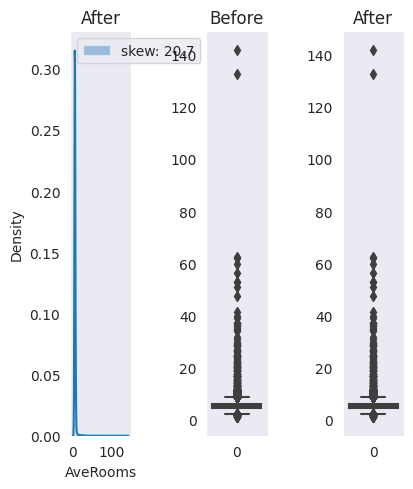

<ipython-input-59-c5b37b2fc6f3>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-59-c5b37b2fc6f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim[col], label="skew: " + str(np.round(df[col].skew(),2)))


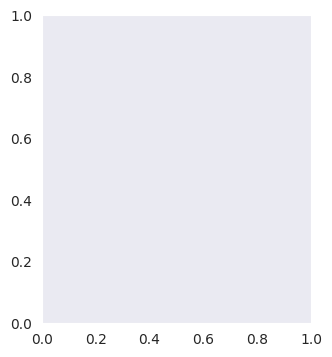

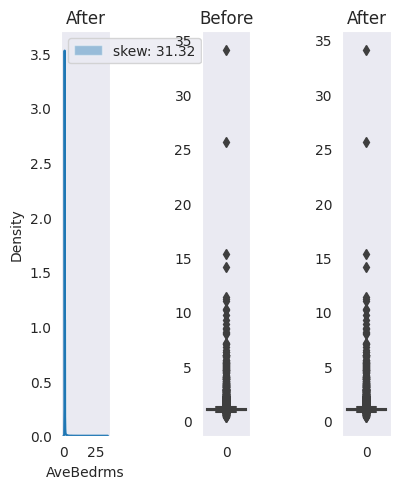

<ipython-input-59-c5b37b2fc6f3>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-59-c5b37b2fc6f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim[col], label="skew: " + str(np.round(df[col].skew(),2)))


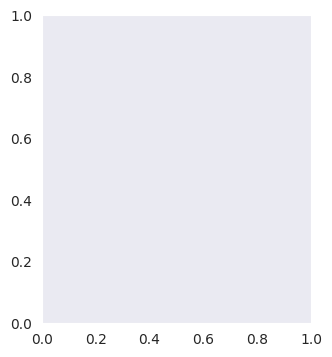

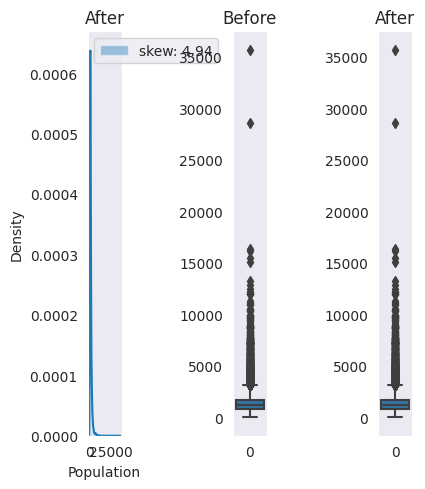

<ipython-input-59-c5b37b2fc6f3>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-59-c5b37b2fc6f3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim[col], label="skew: " + str(np.round(df[col].skew(),2)))


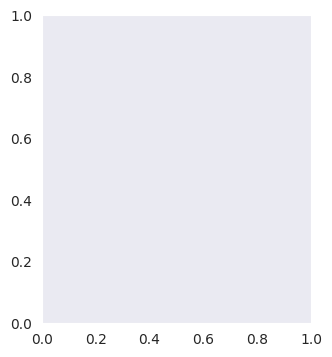

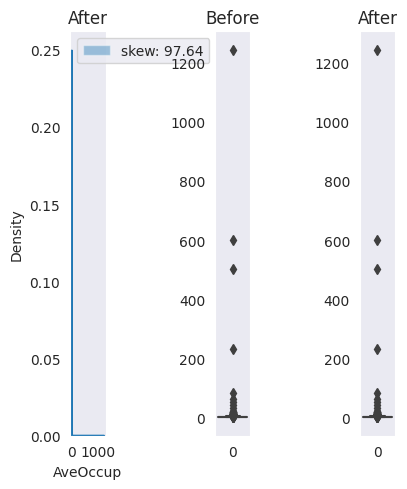

In [59]:
for col in features:
  plt.figure(figsize=(16,4))

  plt.subplot(141)
  sns.displot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
  plt.title('Before')
  plt.legend()

  plt.subplot(142)
  sns.distplot(df_trim[col], label="skew: " + str(np.round(df_trim[col].skew(),2)))
  plt.title('After')
  plt.legend()

  plt.subplot(143)
  sns.boxplot(df[col])
  plt.title('Before')

  plt.subplot(144)
  sns.boxplot(df_trim[col])
  plt.title('After')
  plt.tight_layout()
  plt.show()